<a href="https://colab.research.google.com/github/vkthakur90/AI_Applications/blob/master/Geometric_Brownian_Motion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
mu = 0.20
sigma = 0.15
days = 365 * 2
S0 = 100

In [3]:
delta_t = 1/365

data_df = pd.DataFrame({
    'n' : np.arange(days),
    'W' : np.cumsum(np.random.normal(size = days))
})

In [4]:
mu_eff = mu - 0.5 * sigma ** 2
data_df.eval('t = n * @delta_t', inplace = True)
data_df.eval('S = @S0 * exp(@mu_eff * t + @sigma * sqrt(@delta_t) * W)', inplace = True)
data_df.eval('S_mean = @S0 * exp(@mu * t)', inplace = True)
data_df.eval('S_res = @S0 * exp(@mu * t + 2 * @sigma * sqrt(t))', inplace = True)
data_df.eval('S_sup = @S0 * exp(@mu * t - 2 * @sigma * sqrt(t))', inplace = True)

<Axes: xlabel='t', ylabel='S'>

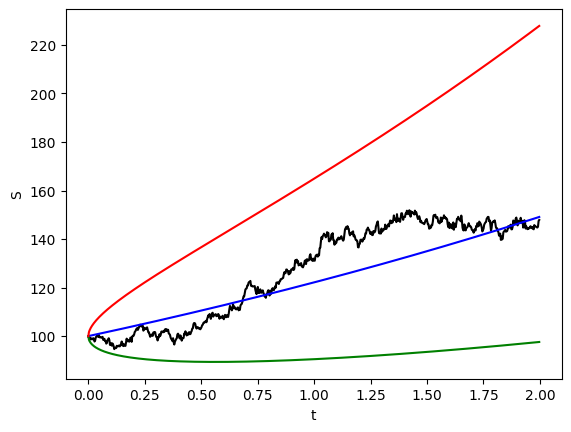

In [5]:
sns.lineplot(x = 't', y = 'S', data = data_df, color = 'black')
sns.lineplot(x = 't', y = 'S_mean', data = data_df, color = 'blue')
sns.lineplot(x = 't', y = 'S_sup', data = data_df, color = 'green')
sns.lineplot(x = 't', y = 'S_res', data = data_df, color = 'red')